In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Part 1:
#### a) Scatter data on life expectancy and GDP
##### Assumptions: We have used data categorized that has geographies categorized as countries, and not any other form of region-format, smaller or larger as countries is the standard when measuring other factors. And such, to compare with other factors, using countries is the most optimal choice, although more smaller regions would possibly yield more insight in region-specific differences. A second assumption is used in this dataset is the GDP metric. It is inflation adjusted, to provide real GDP progression for countries. This provides a more accurate view of the difference between countries and with the country itself across time.

In [2]:
df = pd.read_csv('./Resources/lex.csv')
df2 =pd.read_csv('./Resources/gdp(percapita)(PPP).csv')

gdp = df2.set_index([df2['geo'],df2['time']])
lex = df.set_index([df['geo'],df['time']])
lex.drop(columns=['geo','time'],inplace =True)
gdp.drop(columns=['geo','time'],inplace =True)
lex_gdp = lex.merge(gdp, left_index=True,right_index=True)
lex_gdp.rename(columns={'life_expectancy_at_birth':'LEX','income_per_person_gdppercapita_ppp_inflation_adjusted':'GDP'},inplace=True)

def scatter(df,targetx,targety):
    x = df[targetx] 
    y = df[targety]
    plt.figure(figsize=(16, 8))
    plt.scatter(x,y)
    plt.title('Life expectancy vs GDP per capita Inflation adjusted')
    plt.ylabel('Life Expectancy (Years)')
    plt.xlabel('GDP (PPP) in USD$')
    return plt

def getDFYear(df,year):
    dtindex = df.index.get_level_values(1)
    return df.iloc[dtindex.get_loc(year)]

<module 'matplotlib.pyplot' from 'C:\\Users\\erikh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

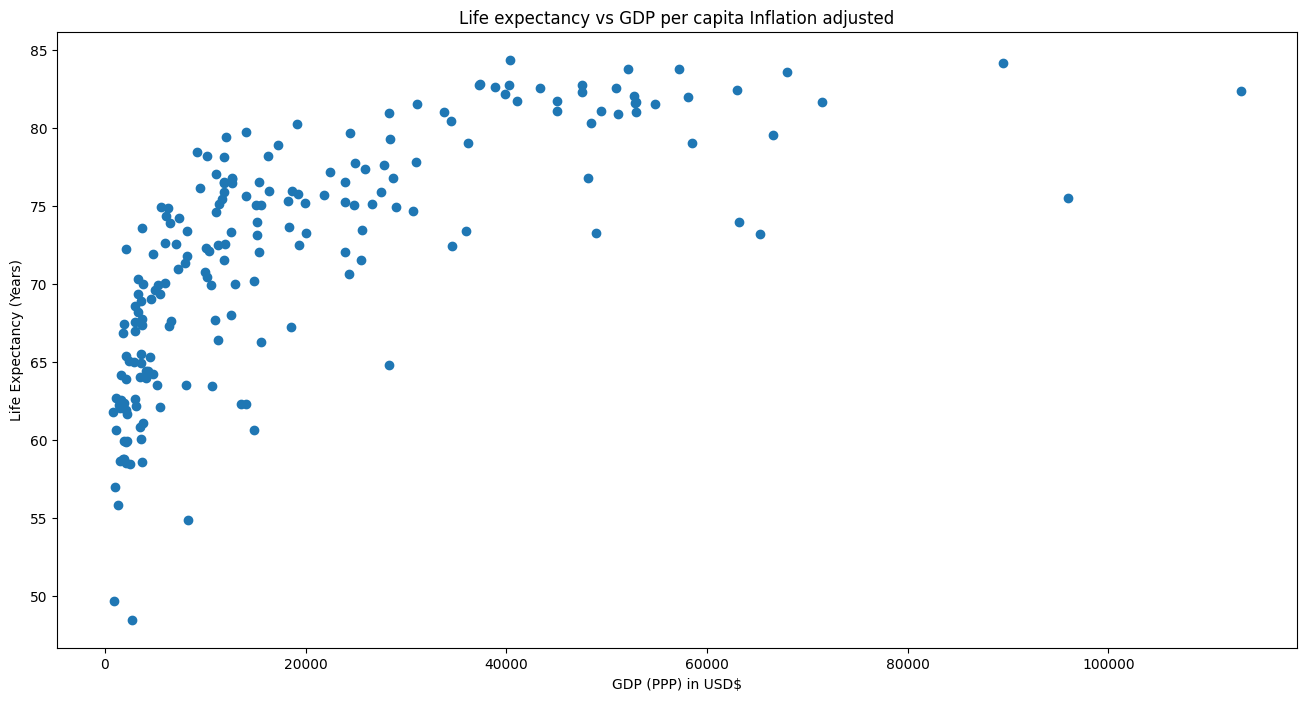

In [3]:
scatter(getDFYear(lex_gdp,2015),'GDP','LEX')



#### b) Scatter data on life expectancy and GDP
##### Assumptions: The scatterplot above shows a trend between an increased wealth wtih an increase in life expectancy. This seems reasonable as having greater means to combat sociatal problems such as sicknesses should reduce early deaths in the population overall and thus increase life expectancy.

#### c) Did you do any data cleaning (e.g., by removing entries that you think are not useful) for the task of drawing scatter plot(s) and the task of answering the questions d, e, f, and g? If so, explain what kind of entries that you chose to remove and why.
##### No, we managed to find, and therafter used publicly accesible data that has already been cleaned. See README.md.

##### d) Which countries have a life expectancy higher than one standard deviation above the mean?
See table below. Unfortunately the datas geography column uses country codes instead of country names. However, this is easily google-able. Some examples from the table below are Monaco, Chile, Colombia, Costa Rica, and Taiwan.

In [4]:
import statistics as stats
import numpy as np


def deviatingEntries(df,target,stepsize,direction):
    dftemp = df
    dftemp.dropna()
    mean = stats.mean(dftemp[target])
    stdev = dftemp[target].std()
    print('Mean:', mean)
    print('Std:',stdev)
    if direction == 'above':
        filtered_df = dftemp[(dftemp[target] > (mean+stdev*stepsize))]
        return filtered_df.sort_values(by=[target])
    if direction == 'below':
        filtered_df = dftemp[(dftemp[target] <= (mean))]
        return filtered_df.sort_values(by=[target])

    


In [28]:
deviatingEntries(getDFYear(lex_gdp,2015),'LEX',1,'above')


Mean: 71.87651282051281
Std: 7.64501759072297


,,LEX,GDP
geo,time,,
mco,2015,79.55,66540
chl,2015,79.63,24440
col,2015,79.69,14096
cri,2015,80.20,19142
twn,2015,80.32,48437
cyp,2015,80.45,34453
deu,2015,80.88,51159
grc,2015,80.92,28260
dnk,2015,80.99,52893


e) Which countries have high life expectancy but have low GDP?

This is seen in table 2. Namely, Colombia and Costa Rica has a high life expectancy, while still being a lower-income country.

In [6]:

HLLGDP = deviatingEntries(getDFYear(lex_gdp,2015),'LEX',1,'above').merge(deviatingEntries(getDFYear(lex_gdp,2015),'GDP',1,'below'),on ='geo')
HLLGDP.drop(columns=['LEX_y','GDP_y'], inplace= True)
HLLGDP.rename(columns={'LEX_x':'LEX','GDP_x':'GDP'},inplace = True)

HLLGDP


Mean: 71.87651282051281
Std: 7.64501759072297
Mean: 19516.733333333334
Std: 20263.599645381768


,LEX,GDP
geo,,
col,79.69,14096
cri,80.20,19142


In [23]:
LLHGDP = deviatingEntries(getDFYear(lex_gdp,2015),'LEX',1,'below').merge(deviatingEntries(getDFYear(lex_gdp,2015),'GDP',1,'above'),on ='geo')
LLHGDP.drop(columns=['LEX_y','GDP_y'], inplace= True)
LLHGDP.rename(columns={'LEX_x':'LEX','GDP_x':'GDP'},inplace = True)

LLHGDP

Mean: 71.87651282051281
Std: 7.64501759072297
Mean: 19516.733333333334
Std: 20263.599645381768


,LEX,GDP
geo,,


##### f) Does every strong economy (normally indicated by GDP) have high life expectancy?

By classifying low as 1 standard deviation below the mean, and high as 1 standard deviation above the mean, there is no country in our dataset that has a high GDP per capita, while still having a low life expectancy. However, in the scatter plot in 1a) there is some outliers from the overall trendline, indicating that other factors than strictly GDP per capita that could be used as an indication for life expectancy. Most likely, for example, a high wealth distribution within the country. Moreover, as we have only used GDP per capita, countries with a large population, such as China and India might have a low life expectancy, while still being able to produce large GDP numbers relative to other countries, indicating a "strong economy". This reveals another reason why GDP won't be able to strictly correlate with life expectancy.

#### g) Related to question f, what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of g and f.

As mentioned above, using GDP per capita instead of GDP would only take the include a country's raw population with its GDP. This would not necessarily improve the metric as countless other factors can affect the life expectancy of a nation, such as air-pollution and above mentioned wealth distribution within a country. If a country has a vast wealth distribution and no social benefits within healtcare, the larger, poorer, population would have the same life expectancy as a nation without the highest earners. It's important to note that although there is some correlation between these metrics, one cannot conclude any absolute cause. Merely, a correlation that would indicate a connection between the two factors.

#### Part 2:
##### a) Second dataset analysis: Happiness & Corruption

A second set of parameters that are interesting to compare are the happiness-score of the population and the corruption-score for the country. Unintuitively, a high corruption-score indicates low corruption, and a lower score indicates that the country is more corrupt. As for Happiness, a high score indicates that the population are happy, while a low score indicates that they are not happy. The hypothesis of the connection between these two scores is that a country ought to be happier, the lower corruption level (high corruption-score) it has. And vice versa.

To get an understanding of the relation between Happiness & Corruption, we first started by isolating two randomly selected countries that had some of the lowest, respectively the highest happiness scores, to see how their respective corruption score is relative to their happiness. The selected countries were Tanzania and Zimbawe representing the lower part of the happiness score, whereas Denmark and Finland got the represent the upper part of the happiness score. The figure below was generated through python and our dataset. For the recorded years, we can see that Tanzanzia has a high score in corruption (i.e. low actual corruption in the country) and at the same time were unhappy. This is especially interesting as it directly stands in opposition to our hypothesis. However, the scores for Denmark, Finland, and Zimbabwe matched our expectations.

Additionally, we constructed an additional model to reflect a snapshot of happiness & corruption in 2011. The model is partly a happy sample, containing the top 10 happiest countries, and a sad sample, which consisted of the 10 countries with the lowest happiness score. We merged this with their respective corruption scores. Looking at the result, we can see that there are some outliers, such as Mexico and Israel with a high happiness score, all while scoring low in corruption (indicating corruption in the country). However, for the countries that scored the lowest in happiness (i.e. sad populations), almost all had a low corruption score (i.e. very corrupt countries). From this, we can conclude that there are other factors, than corruption, that makes a population happy, but being a sad population indicates also that the country is corrupt.
This model was then used in two regressions to further show explainability in the variance of the happiness. With happiness as the dependent variable and corruption as the dependent variable. One regression was done for each of the two constructed samples. The two regressions are shown below.

In [7]:
happy_data = pd.read_csv('./Resources/Happiness-WVS-vs-Gallup.csv')
corruption = pd.read_csv('./Resources/corruption.csv')

happy_data = happy_data[['Year','Entity', 'Life satisfaction in Cantril Ladder (World Happiness Report 2022)']]
happy_data.rename(columns={'Life satisfaction in Cantril Ladder (World Happiness Report 2022)':'Happiness'},inplace=True)
happy_data_10y = happy_data.loc[(happy_data['Year']>2000) & (happy_data['Year']<2010)]

happy_data



,Year,Entity,Happiness
0,2015,Abkhazia,NaN
1,2006,Afghanistan,3.723590
2,2007,Afghanistan,4.401778
3,2008,Afghanistan,4.758381
4,2009,Afghanistan,3.831719
...,...,...,...
56969,2001,Zimbabwe,NaN
56970,2002,Zimbabwe,NaN
56971,2003,Zimbabwe,NaN
56972,2021,Zimbabwe,NaN


In [8]:
happy_data_10y_zim = happy_data_10y.loc[happy_data_10y['Entity']=='Zimbabwe']
happy_data_10y_zim= happy_data_10y_zim.dropna().sort_values(by='Year')
happy_data_10y_tan = happy_data_10y.loc[happy_data_10y['Entity']=='Tanzania']
happy_data_10y_tan = happy_data_10y_tan.dropna().sort_values(by='Year')
happy_data_10y_fin = happy_data_10y.loc[happy_data_10y['Entity']=='Finland']
happy_data_10y_fin= happy_data_10y_fin.dropna().sort_values(by='Year')
happy_data_10y_den = happy_data_10y.loc[happy_data_10y['Entity']=='Denmark']
happy_data_10y_den= happy_data_10y_den.dropna().sort_values(by='Year')

In [9]:
corr_zim = corruption.loc[corruption['Jurisdiction'] =='Zimbabwe']
corr_zim = corr_zim.melt()
corr_zim= corr_zim.drop([0])
corr_zim = corr_zim.loc[(corr_zim['variable'].astype(float)>=2000) & (corr_zim['variable'].astype(float)<=2010)]
corr_zim.rename(columns={'variable':'Year','value':'Corruption'},inplace=True)
corr_zim['Entity'] ='Zimbabwe'
corr_zim= corr_zim.sort_values(by='Year')


corr_tan = corruption.loc[corruption['Jurisdiction'] =='Tanzania']
corr_tan = corr_tan.melt()
corr_tan= corr_tan.drop([0])
corr_tan = corr_tan.loc[(corr_tan['variable'].astype(float)>=2000) & (corr_tan['variable'].astype(float)<=2010)]
corr_tan.rename(columns={'variable':'Year','value':'Corruption'},inplace=True)
corr_tan['Entity'] ='Tanzania'
corr_tan= corr_tan.sort_values(by='Year')


corr_fin = corruption.loc[corruption['Jurisdiction'] =='Finland']
corr_fin = corr_fin.melt()
corr_fin= corr_fin.drop([0])
corr_fin = corr_fin.loc[(corr_fin['variable'].astype(float)>=2000) & (corr_fin['variable'].astype(float)<=2010)]
corr_fin.rename(columns={'variable':'Year','value':'Corruption'},inplace=True)
corr_fin['Entity'] ='Finland'
corr_fin= corr_fin.sort_values(by='Year')

corr_den = corruption.loc[corruption['Jurisdiction'] =='Denmark']
corr_den = corr_den.melt()
corr_den= corr_den.drop([0])
corr_den = corr_den.loc[(corr_den['variable'].astype(float)>=2000) & (corr_den['variable'].astype(float)<=2010)]
corr_den.rename(columns={'variable':'Year','value':'Corruption'},inplace=True)
corr_den['Entity'] ='Denmark'
corr_den= corr_den.sort_values(by='Year')


corr_zim
happy_data_10y_zim

,Year,Entity,Happiness
56714,2004,Zimbabwe,3.826268
56715,2005,Zimbabwe,3.280247
56716,2006,Zimbabwe,3.174264
56717,2007,Zimbabwe,4.055914
56718,2008,Zimbabwe,4.681570
56719,2009,Zimbabwe,4.845642


In [10]:
countries = ['Denmark','Finland','Zimbabwe','Tanzania']

def fooMerger(df1,df2):
    
    df1['Year'] = df1['Year'].astype(int)
    df2['Year'] = df2['Year'].astype(int)
    df1['Corruption']= df1['Corruption'].astype(float)
    temp = pd.merge_asof(df1.sort_values(by ='Year'),df2.sort_values(by ='Year'), by='Entity',on='Year')
    return temp[['Entity','Year','Happiness','Corruption']]



zim = fooMerger(corr_zim,happy_data_10y_zim).dropna()
tan = fooMerger(corr_tan,happy_data_10y_tan).dropna()
fin = fooMerger(corr_fin,happy_data_10y_fin).dropna()
den = fooMerger(corr_den,happy_data_10y_den).dropna()


##reduce denmarks to fit comparison
den = den.drop(den.index[0])

den
    

,Entity,Year,Happiness,Corruption
4,Denmark,2004,8.018934,9.5
5,Denmark,2005,7.834233,9.5
6,Denmark,2006,7.970892,9.5
7,Denmark,2007,7.683359,9.4
8,Denmark,2008,7.770515,9.3
9,Denmark,2009,7.788232,9.3
10,Denmark,2010,7.788232,9.3


In [11]:
def plotCountry(country):
    ax = country.plot(x='Year', y= 'Happiness',legend =False)
    ax.set_ylim(1,10)
    ax.set_ylabel('Happiness')
    ax2 = ax.twinx()
    country.plot(x='Year',y='Corruption',ax = ax2, legend = False, color = 'r')
    ax2.set_ylim(1,10)
    ax2.set_ylabel('Corruption')
    ax.figure.legend()
    return plt.show()

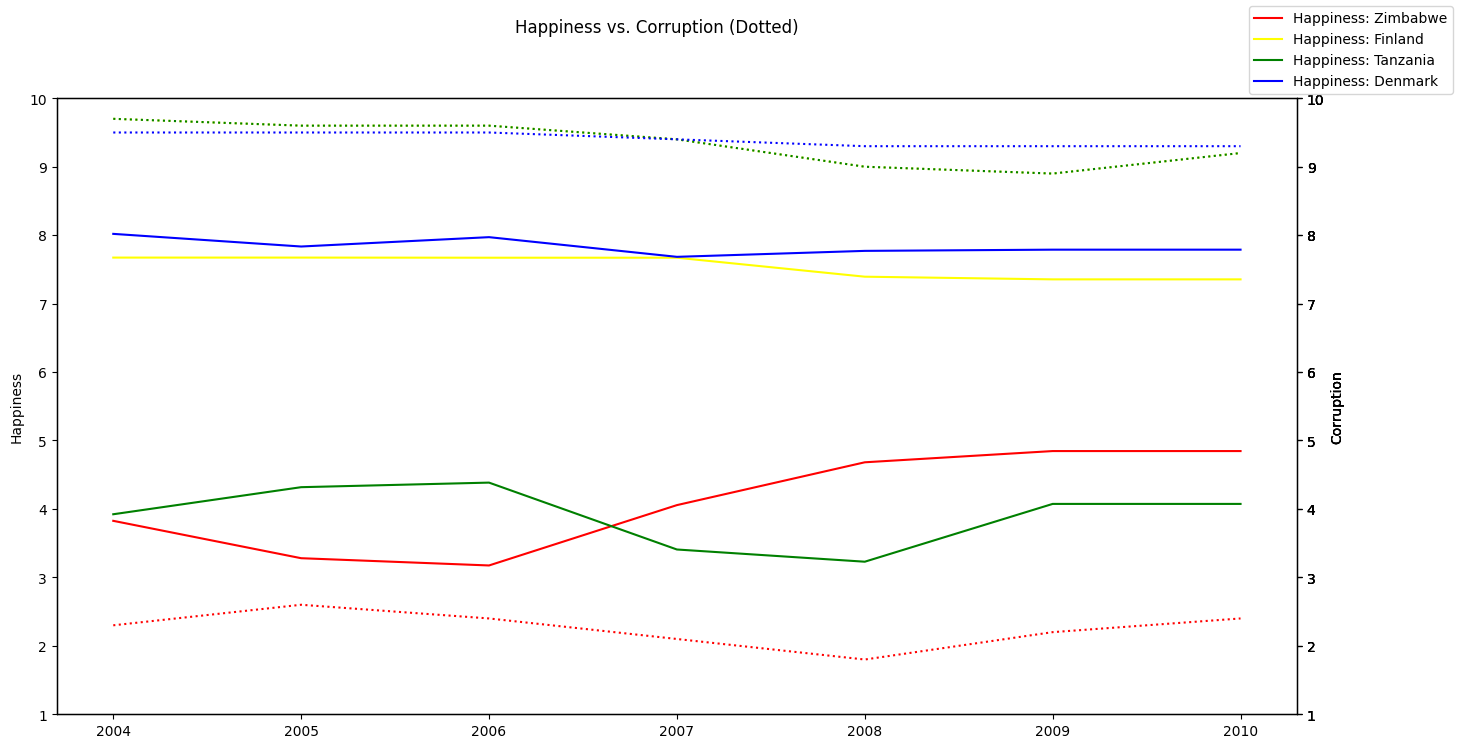

In [12]:

fig, ax = plt.subplots(figsize = (16, 8))
fig.suptitle('Happiness vs. Corruption (Dotted)')
ax.plot(zim['Year'],zim['Happiness'],color ='red', label='Happiness: Zimbabwe')
ax.set_ylim(1,10)
ax.set_ylabel('Happiness')
ax1 = ax.twinx()
ax1.plot(zim['Year'],zim['Corruption'],color ='red',linestyle='dotted')
ax1.set_ylim(1,10)
ax1.set_ylabel('Corruption')

ax.plot(fin['Year'],fin['Happiness'],color ='yellow', label='Happiness: Finland')
ax.set_ylim(1,10)
ax.set_ylabel('Happiness')
ax2 = ax.twinx()
ax2.plot(fin['Year'],fin['Corruption'],color ='yellow',linestyle='dotted')
ax2.set_ylim(1,10)
ax2.set_ylabel('Corruption')

ax.plot(tan['Year'],tan['Happiness'],color ='green', label='Happiness: Tanzania')
ax.set_ylim(1,10)
ax.set_ylabel('Happiness')
ax3 = ax.twinx()
ax3.plot(tan['Year'],fin['Corruption'],color ='green',linestyle='dotted')
ax3.set_ylim(1,10)
ax3.set_ylabel('Corruption')

ax.plot(den['Year'],den['Happiness'],color ='blue', label='Happiness: Denmark')
ax.set_ylim(1,10)
ax.set_ylabel('Happiness')
ax3 = ax.twinx()
ax3.plot(den['Year'],den['Corruption'],color ='blue',linestyle='dotted')
ax3.set_ylim(1,10)
ax3.set_ylabel('Corruption')

fig.legend()

for ax in fig.get_axes():
    ax.label_outer()
        

In [13]:

##Is corruption and happiness correlated?

In [14]:
#sample of above average happiness:
temp = happy_data.dropna()
temp = happy_data.loc[happy_data['Year']==2011]
happiest= deviatingEntries(temp.dropna(),'Happiness',1,'above')
happiest= happiest.sort_values(by='Happiness',ascending=False).head(10)

happiest_con = []
for entity in happiest['Entity']:
    happiest_con.append(entity)
#(happy_data[['Year']]==2000).value_counts()
#deviatingEntries('getDFYear(happy_data,2010)','Happiness',1,'above')
print(happiest_con)
happiest

Mean: 5.3945679316555495
Std: 1.180767591360378
['Canada', 'Denmark', 'Iceland', 'Austria', 'Finland', 'Mexico', 'Sweden', 'Netherlands', 'Australia', 'Israel']


,Year,Entity,Happiness
8863,2011,Canada,7.593794
13182,2011,Denmark,7.588607
22325,2011,Iceland,7.501394
3205,2011,Austria,7.498803
17021,2011,Finland,7.444636
32014,2011,Mexico,7.442546
48568,2011,Sweden,7.434011
35087,2011,Netherlands,7.406550
2947,2011,Australia,7.364169
23956,2011,Israel,7.320563


In [15]:
# sample of below average happiness:

saddest= deviatingEntries(temp.dropna(),'Happiness',1,'below')
saddest= saddest.sort_values(by='Happiness').head(10)
saddest_con = []
for entity in saddest['Entity']:
    saddest_con.append(entity)
#(happy_data[['Year']]==2000).value_counts()
#deviatingEntries('getDFYear(happy_data,2010)','Happiness',1,'above')
print(saddest_con)
saddest


Mean: 5.3945679316555495
Std: 1.180767591360378
['Syria', 'Burkina Faso', 'Rwanda', 'Benin', 'Chad', 'Egypt', 'Afghanistan', 'Senegal', 'South Africa', 'Cambodia']


,Year,Entity,Happiness
49084,2011,Syria,2.687553
7826,2011,Burkina Faso,3.325950
41770,2011,Rwanda,3.466388
5534,2011,Benin,3.479413
9686,2011,Chad,3.507663
14476,2011,Egypt,3.558520
6,2011,Afghanistan,3.572100
44104,2011,Senegal,3.647367
46478,2011,South Africa,3.660727
8345,2011,Cambodia,3.674467


In [16]:
#corruption_h= corruption.loc[corruption['Jurisdiction'] saddest_con]
temp = []
for a in saddest_con:
    temp.append(corruption.loc[corruption['Jurisdiction']==a]) 
corrup_s = pd.concat(temp)
corrup_s
corrup_s= corrup_s[['Jurisdiction','2011']]
corrup_s
temp.clear()

for a in happiest_con:
    temp.append(corruption.loc[corruption['Jurisdiction']==a]) 
corrup_h = pd.concat(temp)
corrup_h= corrup_h[['Jurisdiction','2011']]
corrup_h.rename(columns={'Jurisdiction':'Entity','2011':'Corruption'},inplace=True)
corrup_h


,Entity,Corruption
31,Canada,8.67
62,Denmark,9.39
94,Iceland,8.27
7,Austria,7.79
76,Finland,9.4
135,Mexico,2.97
193,Sweden,9.3
145,Netherlands,8.89
6,Australia,8.84
100,Israel,5.81


In [17]:
corrup_s.rename(columns={'Jurisdiction':'Entity','2011':'Corruption'},inplace=True)
corrup_s

,Entity,Corruption
195,Syria,2.56
27,Burkina Faso,3.05
166,Rwanda,4.98
16,Benin,2.97
34,Chad,2.04
69,Egypt,2.86
0,Afghanistan,1.52
173,Senegal,2.87
185,South Africa,4.08
29,Cambodia,2.11


In [18]:
happy_sample = pd.merge(corrup_h,happiest,on='Entity')
sad_sample = pd.merge(corrup_s,saddest,on='Entity')

In [19]:
happy_sample

,Entity,Corruption,Year,Happiness
0,Canada,8.67,2011,7.593794
1,Denmark,9.39,2011,7.588607
2,Iceland,8.27,2011,7.501394
3,Austria,7.79,2011,7.498803
4,Finland,9.4,2011,7.444636
5,Mexico,2.97,2011,7.442546
6,Sweden,9.3,2011,7.434011
7,Netherlands,8.89,2011,7.406550
8,Australia,8.84,2011,7.364169
9,Israel,5.81,2011,7.320563


In [20]:
sad_sample

,Entity,Corruption,Year,Happiness
0,Syria,2.56,2011,2.687553
1,Burkina Faso,3.05,2011,3.325950
2,Rwanda,4.98,2011,3.466388
3,Benin,2.97,2011,3.479413
4,Chad,2.04,2011,3.507663
5,Egypt,2.86,2011,3.558520
6,Afghanistan,1.52,2011,3.572100
7,Senegal,2.87,2011,3.647367
8,South Africa,4.08,2011,3.660727
9,Cambodia,2.11,2011,3.674467


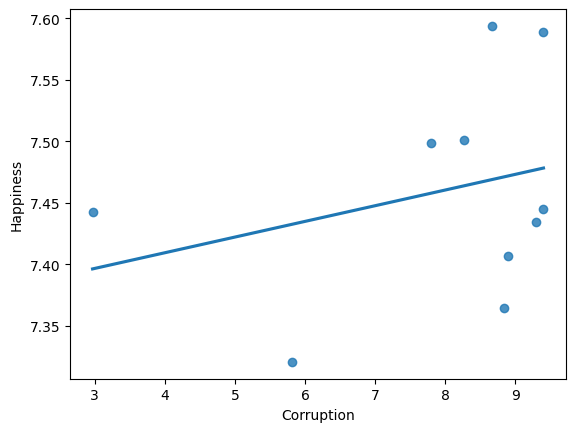

In [21]:
import seaborn as sns

happy_sample['Corruption'] = happy_sample['Corruption'].astype(float)

#happyplot = sns.regplot(happy_sample['Corruption'].astype(float),happy_sample['Happiness'],ci = None)
happyplotnew = sns.regplot(data =happy_sample,x ='Corruption',y='Happiness',ci=None)




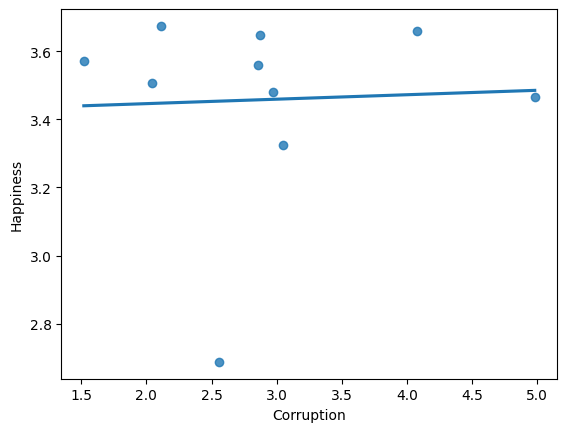

In [22]:
sad_sample['Corruption'] = sad_sample['Corruption'].astype(float)
sadplotnew = sns.regplot(data =sad_sample,x ='Corruption',y='Happiness',ci=None)


In [ ]:
##### b) Discussion of Happiness & Corruption
#As mentioned in the earlier section, it is interesting that the combination of happiness and corruption in Tanzania directly went against our hypothesis, while the Finland, Denmark, and 
# Zimbabwe confirmed our hypothesis that happiness and corruption is somewhat correlated. However, this exercise goes to show how there are outliars and that one factor does not 
# necessarily cause the other factor.
# 
# When it comes to the happy sample and the sad sample, we can see that Mexico stood out signifcantly. Further confirming that a corrupt state does not imply that the population is unhappy.
# However, when observing the sad sample, it shows that sad populations live in corrupt societies. At least for the observed year of 2011 in our dataset. Jointly, these observations serve as
# meaningful insight of what drives happiness, and where we find corrupt states; in unhappy places.
#
# The regressions further confirm what is discussed above. In the first regression, with the happy sample, we see the straight fitted line with certain variance of the observations.
# And although the y-axis is very zoomed in, along the x-axis we truly see the two outliars in (Mexico and Israel) on the bottom left side of the figure.
# Looking at the second regression instead, with the sad sample, we can observe that the line is nearly straight, and a relativelty homoscedastic regression result. I.e.,
# the observations in the sad sample follows the happiness level throughout the lower corruption-scores through 1.5 to 5.
#